# Plotting in Julia
> Data graphics visually display measured quantities by means of the combined use of _points_, _lines_, _a coordinate system_, _numbers_, _symbols_, _words_, _shading_, and _color_.
> -- <cite>Edward R. Tufte, The Visual Display of Quantitative Information</cite>

As this quote implies, the task of displaying graphics comes with a number of design decisions. My goal in this tutorial is to make these decisions easier. 

Julia allows users to perform plotting using multiple packages. You'll find a list with comments at the end of this tutorial. 

But for this tutorial, I use the package Plots.jl with pyplot backend. We will walk through the installation and move on to create some awesome graphics together!

## Getting started
We need two main packages for the rest of this tutorial. Namely: "Plots.jl" and "PyPlot.jl"
Why Plots?

Plots.jl supports multiple backends
* PyPlot
* Plotly
* GR
* UnicodePlots
* PGFPlots
* ... and there's more

Each of the plotting packages in Julia has its advantages and disadvantages. Plots.jl provides an "abstraction" level to all these packages and unifies them with same function calls and user interface. We use one of the above packages as a _backend_. This means that if you decide to switch the backend plotting package for some reason, you don't have to learn new syntax or redo all your previous code. You can simply change your backend.

Why PyPlot?
It's currently very well supported by Plots.jl and relatively faster than its competitors. (I may be wrong but this has been my experience so far!)


In [1]:
# Pkg.add("Plots") #to add the Plots package
# Pkg.add("PyPlot") #to add the backend package
using Plots


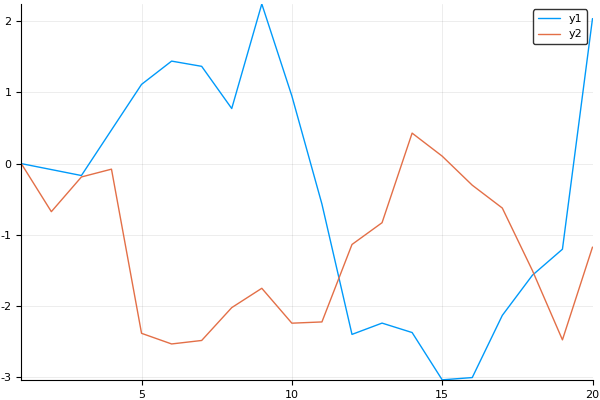

In [2]:
# plot number 1
# Let's get some random data to play around with it
data = Plots.fakedata(20,2) # create a 20 x 2 fake data
plot(data)

### What happened in the above 2 lines of code?
* Backend was picked. How?
* plot occured and was displayed
    * What happens when we run `plot(data);`
    * What happens when we run `f = plot(data)`
    * What happens when we run `@show f`


f = Plot{Plots.PyPlotBackend() n=2}



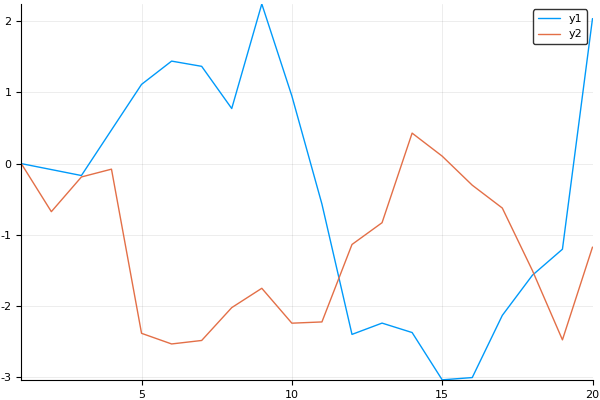

In [3]:
plot(data);
f = plot(data);
@show f;
f

# Tip: Think of your plot as a variable, you can add to it, modify its properties, 
# save it to a file, and many more


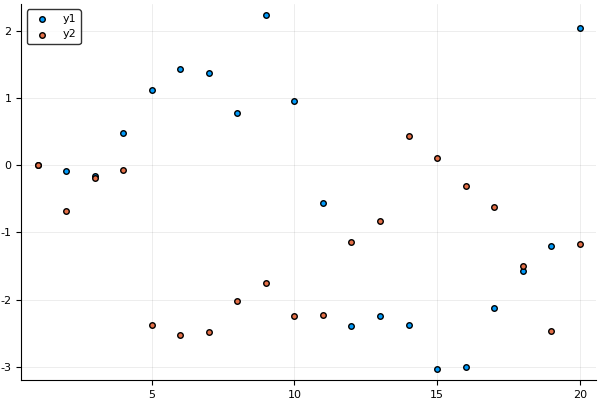

In [4]:
# plot number 2 (markers)
# let's start by how can we show the same two plots using different 
scatter(data)

In [6]:
# symbols to choose from:
marker_symbols = [ 
    :none,
    :auto, 
    :circle, 
    :rect, 
    :diamond, 
    :hexagon, 
    :cross, 
    :xcross, 
    :utriangle, 
    :dtriangle, 
    :rtriangle, 
    :ltriangle, 
    :pentagon, 
    :heptagon, 
    :octagon, 
    :star4, 
    :star5, 
    :star6, 
    :star7, 
    :star8, 
    :vline, 
    :hline, 
    :+, 
    :pixel,
    :x
    ]

scatter(data,markershape = marker_symbols[end])
# Hack: if you are stuck at which marker to choose, you can do the following:
scatter(data,markershape = :f)
# this will show a warning message with all the marker shapes you could use, 
# if you don't want to go looking for them

# The proper way to do that is call:
Plots.supported_markers()

25-element Array{Symbol,1}:
 :none     
 :auto     
 :circle   
 :rect     
 :star5    
 :diamond  
 :hexagon  
 :cross    
 :xcross   
 :utriangle
 :dtriangle
 :rtriangle
 :ltriangle
 :pentagon 
 :heptagon 
 :octagon  
 :star4    
 :star6    
 :star7    
 :star8    
 :vline    
 :hline    
 :+        
 :x        
 :pixel    


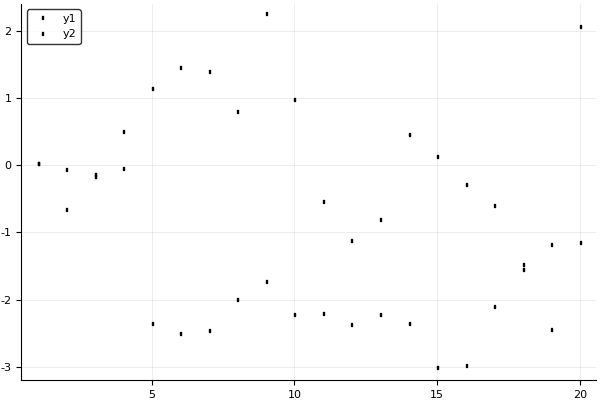

In [5]:
# You can create your own marker shape!
scatter(data,markershape = Shape([0,1,1,0],[0,0,3,3]))
# Shape([0,1,1,0],[0,0,3,3]) is a rectangle of width 1 and height 3


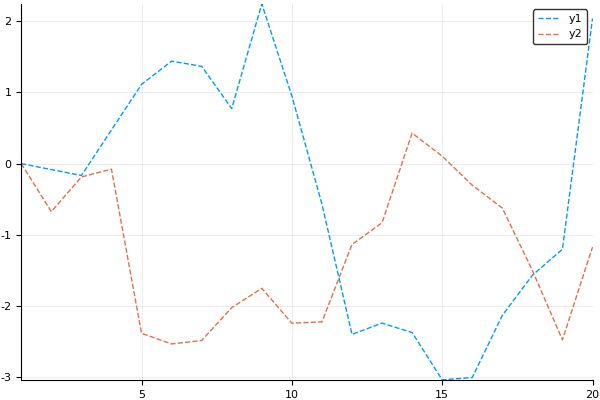

In [7]:
# plot number 3 (lines)
# similar to the previous section
linestyle_symbols = [:auto, :solid, :dash, :dot, :dashdot]
plot(data,linestyle = :dash)


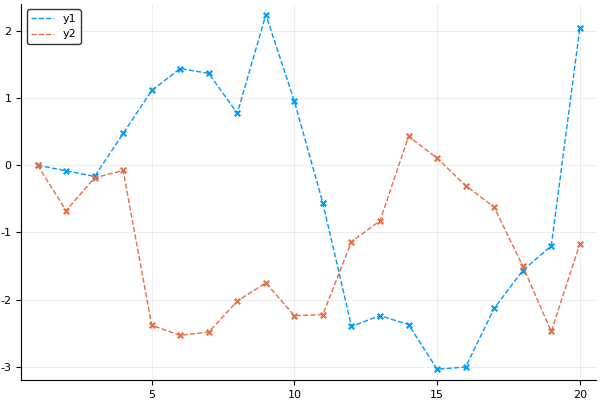

In [8]:
plot(data, markershape = :x, linestyle = :dash)

In [9]:
# plot number 4
# So far, we've seen how to change the points shapes and the line styles
# We have only used default settings so far
# Let's try to change these defaults:

# 1. legend
# 2. axis
# 3. background


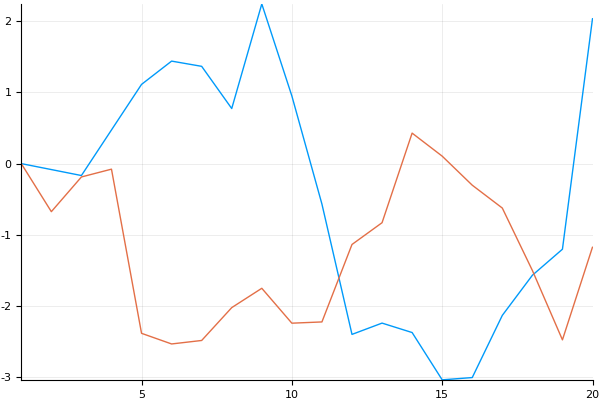

In [10]:
# 4.1 (legend)
# turning the legend off or on is easy:
plot(data,legend=false) # default is true


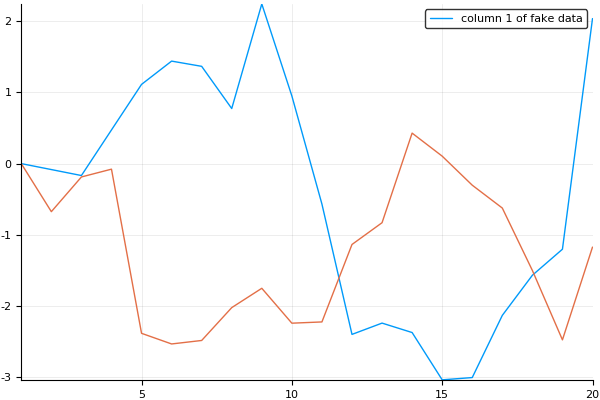

In [12]:
# you can give proper labels to your data
data_labels = hcat("column 1 of fake data","column 2 of fake data")
plot(data,labels=data_labels)
# tip: data_labels should be a row vector

# you can also to choose to not label certain things:
data_labels = hcat("column 1 of fake data","")
plot(data,labels=data_labels)



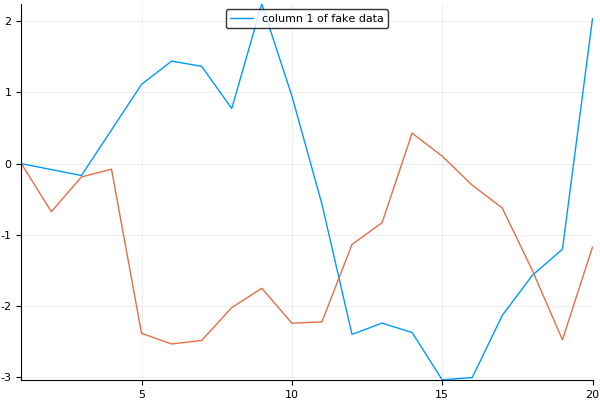

In [14]:
plot(data,labels=data_labels, legend = :top)
# you can choose from: :bottom, :bottomleft, :bottomright, :top, :topleft, :topright
# :left, :right


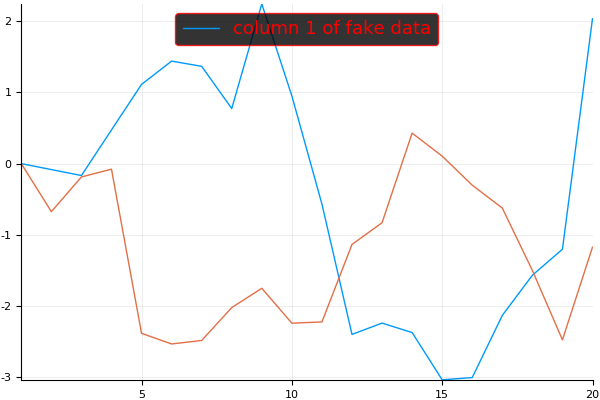

In [15]:
# tip: think of the legend as its own "subplot", you can do many things with it:
plot(data,labels=data_labels, legend = :top, background_color_legend = :black,
foreground_color_legend = :red, legendfont = font(13))


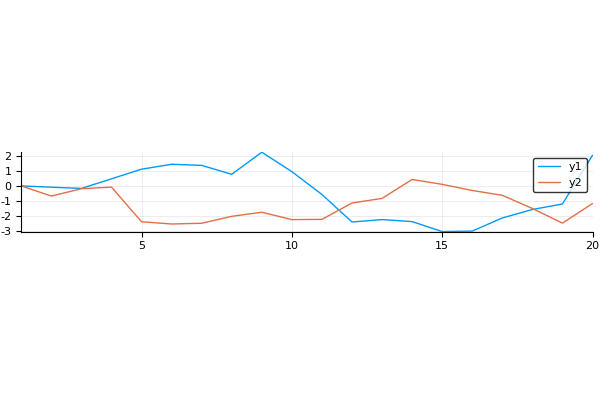

In [16]:
# 4.2 (axis)
# adjusting the lengths of our axes is easy
plot(data,aspect_ratio = 1/2) #aspect ratio is height/width


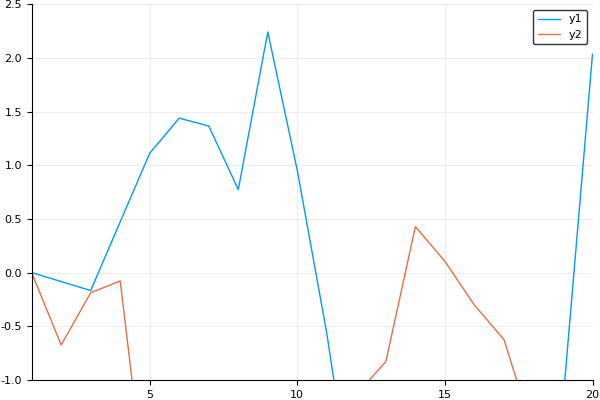

In [18]:
plot(data,ylim = (-1,2.5)) #can use xlim in the same way


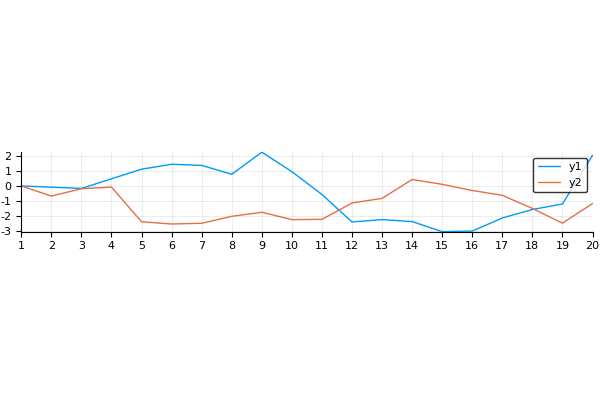

In [19]:
plot(data,aspect_ratio = 1/2,xticks = 1:20) # can do the same for yticks


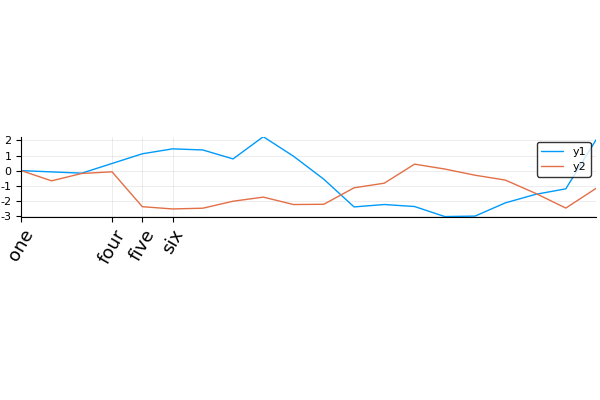

In [21]:
xtickslabels = ["one","four","five","six"]
plot(data,aspect_ratio = 1/2,xticks = ([1,4,5,6],xtickslabels),xrotation=60,xtickfont=font(13)) 


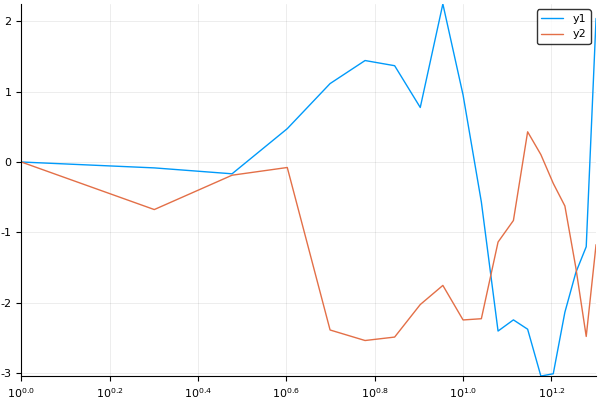

In [22]:
# can use log scale easily:
plot(data,xaxis=:log10)


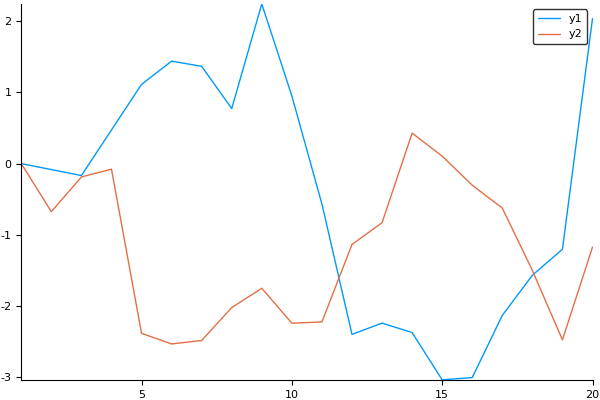

In [23]:
# 4.3 (background)
# changing the background is easy -- but I don't know why anyone would want to do that
plot(data,background_color=:green)
plot(data,grid=false)

In [24]:
# plot number 5
# How about having text in our plots?

# 1. English words
# 2. LaTeX equations


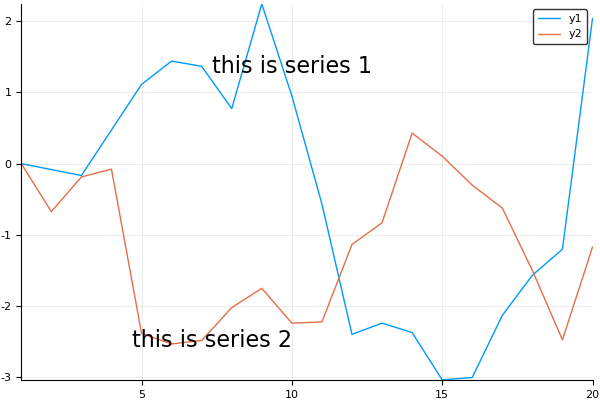

In [25]:
# 5.1 (English words)
plot(data)
annotate!([(10,data[7,1],text("this is series 1",16,:center)),
          (10,data[7,2],text("this is series 2",:right,16))])


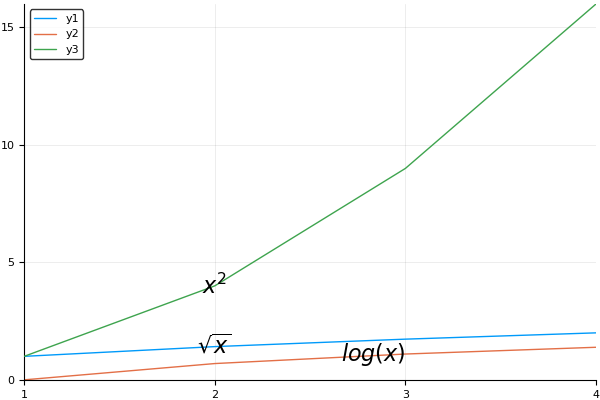

In [35]:
using LaTeXStrings
x = 1:4

y1 = sqrt.(x)
y2 = log.(x)
y3 = x.^2

plot(x,y1)
plot!(x,y2)
plot!(x,y3)

annotate!([(2,y1[2],text(L"\sqrt{x}",16,:center)),
          (3,y2[3],text(L"log(x)",:right,16)),
          (2,y3[2],text(L"x^2",16))])


In [36]:
# plot number 6 (stats)
# So far, the goal was to be able to control all these features of plotting easily.
# Next, we will go over some popular kinds of plots people seem to use:

# 1. histogram plots
# 2. box plots or violin plots


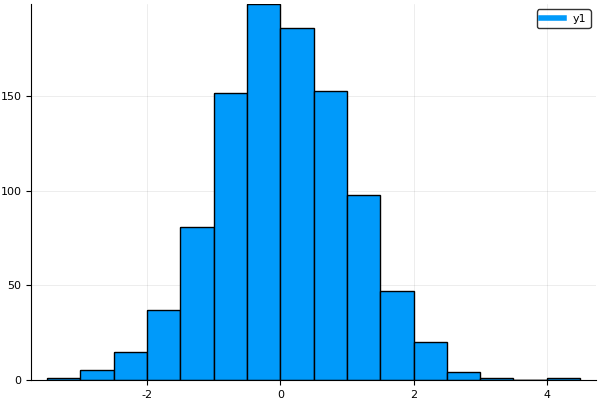

In [37]:
# 6.1 (histograms)
n = 1000
set1 = randn(n)
histogram(set1,nbins=20)# can add the following: color=:red,legend=false


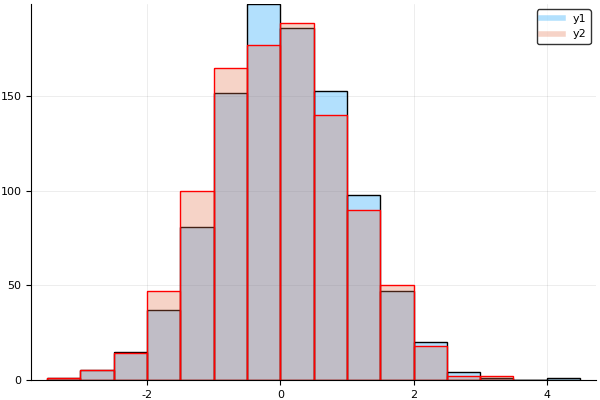

In [38]:
# what if we want to view two histograms side by side
set2 = randn(n)
histogram(set1,nbins=20,fillalpha=0.3)
histogram!(set2,nbins=20,linecolor = :red,fillalpha=0.3,bar_position = :ss)


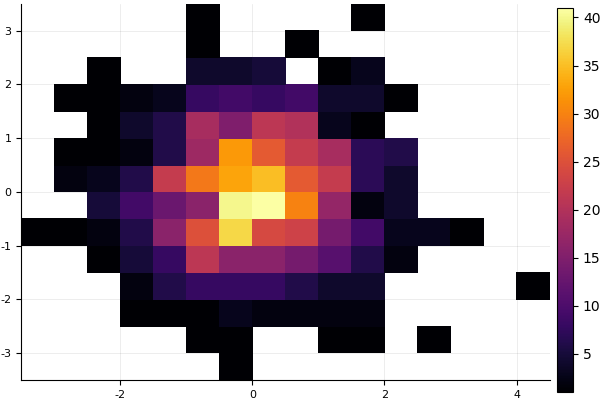

In [40]:
histogram2d(set1,set2,nbins=20)

INFO: Precompiling module Distributions.
INFO: Precompiling module DataFrames.
INFO: Precompiling module TableTraits.
INFO: Precompiling module DataValues.
INFO: Precompiling module KernelDensity.
INFO: Precompiling module Loess.



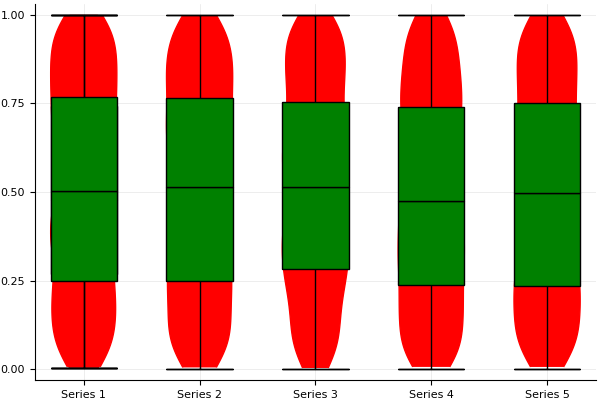

In [41]:
# 6.2 (box and violin)
pyplot()
# Pkg.add("StatPlots")
using StatPlots
y = rand(1000,6)
violin(["Series 1" "Series 2" "Series 3" "Series 4" "Series 5"],y,leg=false,color=:red)
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4" "Series 5"],y,leg=false,color=:green)
# Same distribution yay!


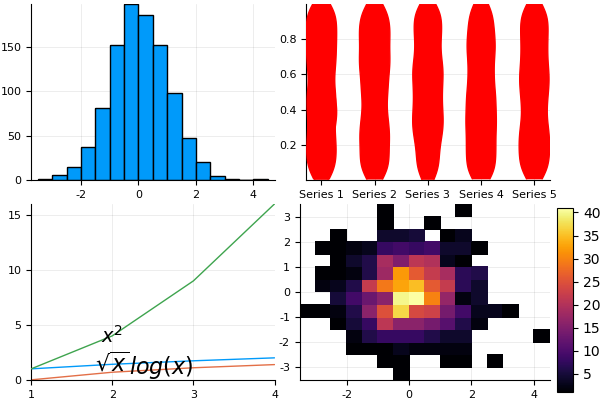

In [44]:
# plot number 7
# multiple plots at once (layout)
# introduce the ! convension

# We can do multiple plots at once via the `layout` keyword
# Let's say we want to make a plot that combines some of the plots we have already prepared:

p1 = histogram(set1,nbins=20)

p2 = violin(["Series 1" "Series 2" "Series 3" "Series 4" "Series 5"],y,leg=false,color=:red)

p3 = plot(x,y1)
plot!(p3,x,y2)
plot!(p3,x,y3)
annotate!(p3,[(2,y1[2],text(latexstring("\$\\sqrt{x}\$"),16,:center)),
          (3,y2[3],text(latexstring("log(x)"),:right,16)),
          (2,y3[2],text(latexstring("\$x^2\$")),16)])

p4 = histogram2d(set1,set2,nbins=20)

plot(p1,p2,p3,p4,layout=(2,2),legend=false)

# this layout:
# 1 2
# 3 4


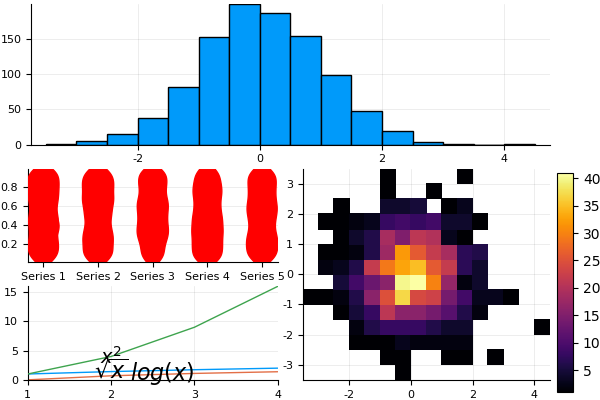

In [45]:
# But what if we want some other distribution of the same plots?
# You can create your own layout!

mylayout = @layout([a{0.4h};[b;c] d])
plot(p1,p2,p3,p4,layout=mylayout,legend=false)

In [46]:
# plot number 8
# graph plots
# Now we can write our own graph plotting function!
using Plots

pyplot()
A = [0 1 1; 1 0 1; 1 1 0] # adjacency matrix
xy = [1 0; 0 1; 0 0] # xy coordinates

# This function uses tricks we have learned so far to plot a graph
function graphplot(A,xy)
    f = plot(leg=false, axis = false)
    ei,ej,w = findnz(triu(A))
    lx = [xy[ei,1]';xy[ej,1]';NaN*ones(1,length(ei))]
    ly = [xy[ei,2]';xy[ej,2]';NaN*ones(1,length(ei))]
    for i = 1:length(w)
        plot!(f,lx[:,i],ly[:,i],color = :black, linewidth = 1)
    end
    scatter!(f,xy[:,1],xy[:,2],color = :black)
    return f
end

graphplot (generic function with 1 method)


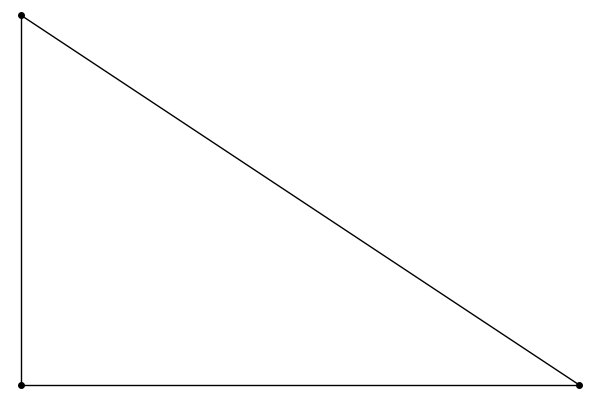

In [47]:
A = [0 1 1; 1 0 1; 1 1 0]
xy = [1 0; 0 1; 0 0]
f = graphplot(A,xy)

# In many cases, we don't have the xy coordinates. What do we do?


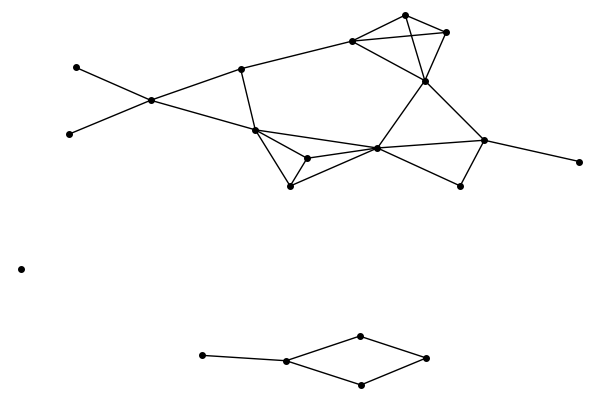

In [48]:
using PyCall
@pyimport igraph
using MatrixNetworks
A = load_matrix_network("cores_example")

function igraph_layout{T}(A::SparseMatrixCSC{T}, layoutname::AbstractString="lgl")
    (ei,ej) = findnz(A)
    edgelist = [(ei[i]-1,ej[i]-1) for i = 1:length(ei)]
    nverts = size(A)
    G = igraph.Graph(nverts, edges=edgelist, directed=true)
    layoutname = "fr"
    xy = G[:layout](layoutname)
    xy = [ Float64(xy[i][j]) for i in 1:length(xy),  j in 1:length(xy[1])]
end

xy = igraph_layout(A)
f = graphplot(A,xy)


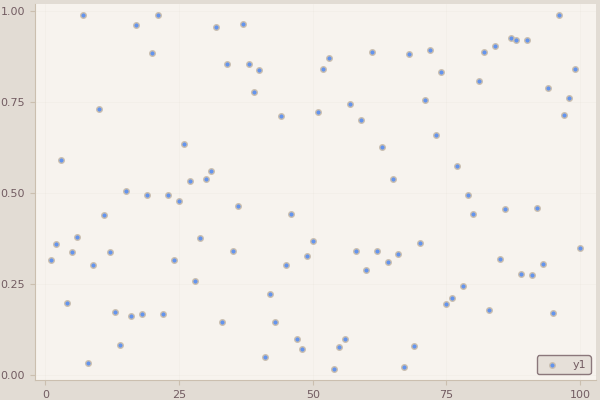

In [49]:
# plot number 9 (Misc)
# 9.1
using Plots
using PyPlot
pyplot()
theme(:sand)
x = 1:100
y = rand(100)
scatter(x,y)
# theme(:juno)
# theme(:default)


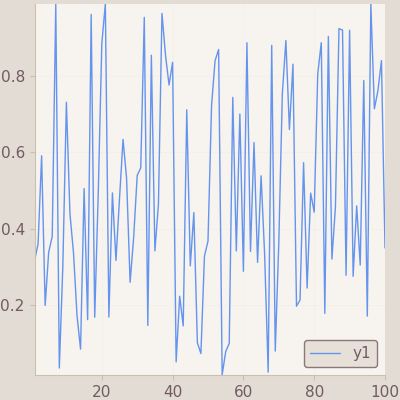

In [51]:
# 9.2 you can set things globally in the pyplot() line
font = Plots.font("sans-serif", 11)
pyplot(size=(400,400),guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
plot(x,y)

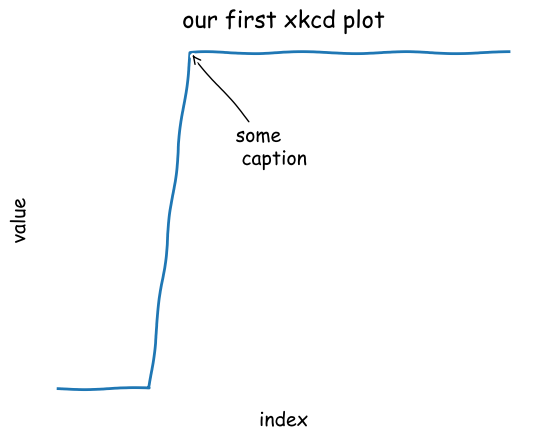

In [53]:
# 9.3
# Did you know you can do XKCD kind of plots?
# Pkg.add("") if needed
using PyPlot
x = 1:100
y = vcat(ones(Int,20),1:10,10*ones(70))

xkcd()
fig = figure()#("xkcd",figsize=(x,y))
ax = axes()
p = PyPlot.plot(x,y)
annotate("some \n caption",xy=[30;10],arrowprops=Dict("arrowstyle"=>"->"),xytext=[40;7])

xticks([])
yticks([])
xlabel("index")
ylabel("value")
title("our first xkcd plot")

ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_color]("none") 
ax[:spines]["bottom"][:set_color]("none") 

fig[:canvas][:draw]()
display(fig)

